# Decision Trees

In [3]:
import pandas as pd
data= pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [28]:
# Preparing Gender and Age variable for model
cat_var=data["Gender"]
cat_var=pd.get_dummies(data=cat_var)

data=pd.concat([data,cat_var], axis=1)
data=data.drop(columns=['Gender','User ID'])

In [29]:
data.head()

,Age,EstimatedSalary,Purchased,Female,Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [30]:
X = data[['Female','Male','Age','EstimatedSalary']]
y = data[['Purchased']]

In [31]:
X.shape

(400, 4)

In [35]:
X.dtypes

Female             uint8
Male               uint8
Age                int64
EstimatedSalary    int64
dtype: object

In [32]:
y.shape

(400, 1)

In [33]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [39]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [40]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.825


## Visualizing Decision Trees

[Text(145.6150684931507, 208.38, 'X[2] <= 42.5\ngini = 0.448\nsamples = 280\nvalue = [185, 95]'),
 Text(73.38082191780822, 190.26, 'X[3] <= 89500.0\ngini = 0.272\nsamples = 209\nvalue = [175, 34]'),
 Text(41.276712328767125, 172.14, 'X[2] <= 36.5\ngini = 0.055\nsamples = 177\nvalue = [172, 5]'),
 Text(32.104109589041094, 154.01999999999998, 'gini = 0.0\nsamples = 119\nvalue = [119, 0]'),
 Text(50.44931506849315, 154.01999999999998, 'X[3] <= 83500.0\ngini = 0.158\nsamples = 58\nvalue = [53, 5]'),
 Text(41.276712328767125, 135.89999999999998, 'X[3] <= 67500.0\ngini = 0.131\nsamples = 57\nvalue = [53, 4]'),
 Text(32.104109589041094, 117.77999999999999, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(50.44931506849315, 117.77999999999999, 'X[3] <= 70500.0\ngini = 0.245\nsamples = 28\nvalue = [24, 4]'),
 Text(41.276712328767125, 99.66, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(59.62191780821918, 99.66, 'X[2] <= 40.5\ngini = 0.198\nsamples = 27\nvalue = [24, 3]'),
 Text(50.449315

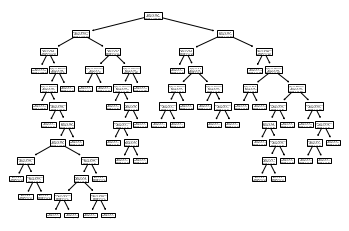

In [68]:
from sklearn import tree
tree.plot_tree(clf)

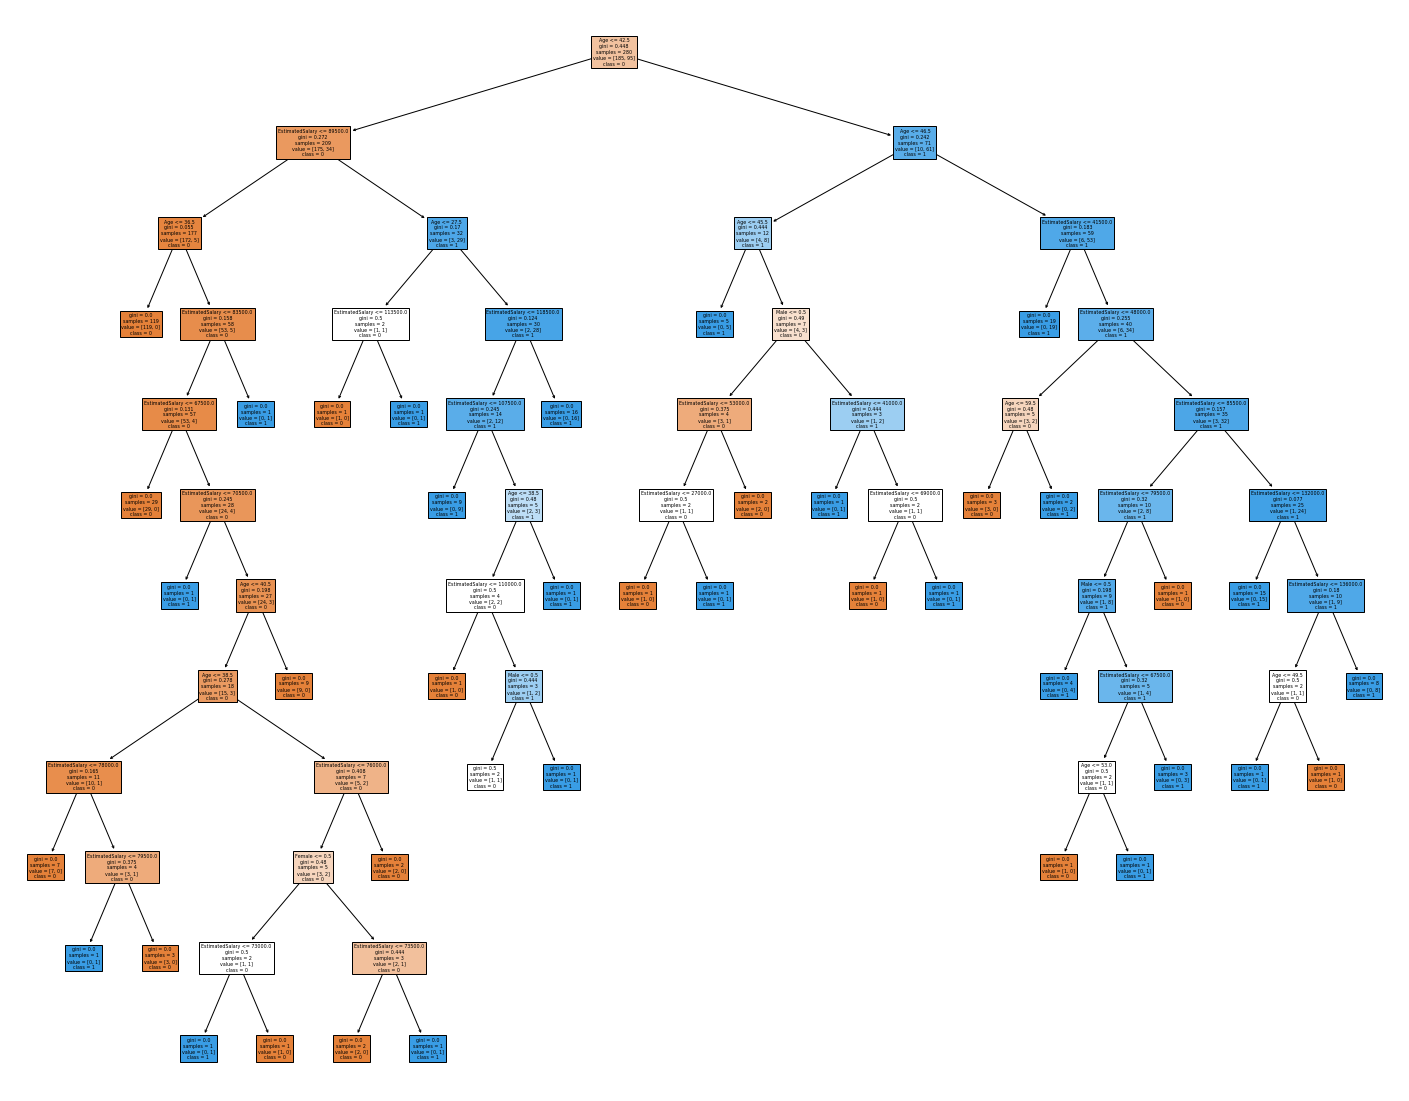

In [70]:
fn=['Female','Male','Age','EstimatedSalary']
cn=['0','1']

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)